<a href="https://colab.research.google.com/github/Kulshrch/Projects/blob/main/Project_Fetal_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetal Health Classification 
Fetal death refers to the spontaneous intrauterine death of a fetus at any time during pregnancy.
Cardiotocography (CTG) is a continuous recording of the fetal heart rate obtained via an ultrasound transducer placed on the mother's abdomen. CTG is widely used in pregnancy as a method of assessing fetal well‐being, predominantly in pregnancies with increased risk of complications.Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality.
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
1.   Normal
2.   Suspect
3.   Pathological



In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [41]:
url='https://raw.githubusercontent.com/Kulshrch/Projects/main/fetal_health.csv'
df=pd.read_csv(url,index_col=0)

In [42]:
df

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,,,,,,,,,,,,,,,,,,,,,
120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0


In [43]:
df.columns

Index(['accelerations', 'fetal_movement', 'uterine_contractions',
       'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [44]:
df.describe()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [45]:
df.shape

(2126, 21)

In [46]:
df.isna().sum()

accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                                            0
histogram_mean                          

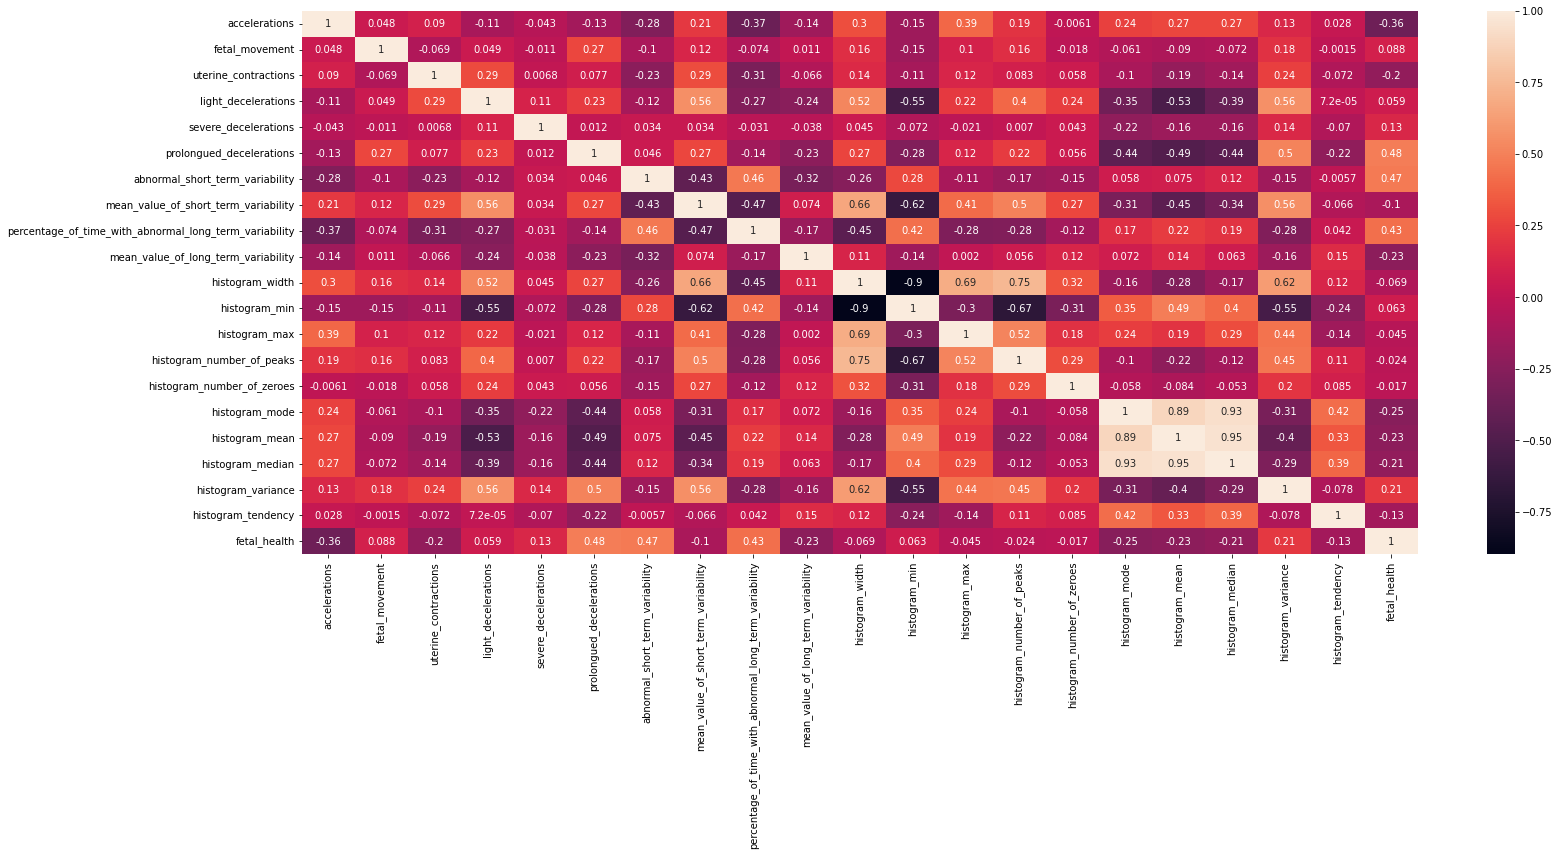

In [47]:
plt.figure(figsize=(25,10))
cor=df.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [48]:
cor_target=abs(cor["fetal_health"])
features=cor_target[cor_target>0.3]
features=features.index.tolist()
features

['accelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'fetal_health']

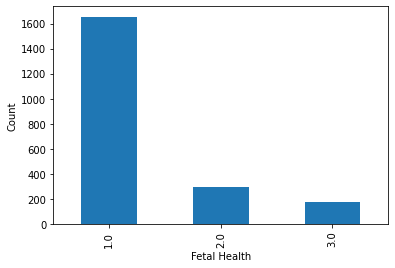

In [49]:
df['fetal_health'].value_counts().plot(kind='bar')
plt.title("")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.show()

In [75]:
df.drop(['fetal_movement', 'uterine_contractions',    
                       'light_decelerations', 'severe_decelerations',
                       'mean_value_of_short_term_variability', 
                       'mean_value_of_long_term_variability',
                       'histogram_width',     
                       'histogram_min',
                       'histogram_max', 'histogram_number_of_peaks',    
                       'histogram_number_of_zeroes', 'histogram_tendency'],1,inplace=True)

<ipython-input-75-1244dbe39e3c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['fetal_movement', 'uterine_contractions',


In [76]:
y = df['fetal_health']
X = df.drop(['fetal_health'], axis=1)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Applying Different ML models

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

1. Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
y_pred = lr_model.predict(X_test)
y_pred 

array([1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 3., 2., 2., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 1., 3., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 3., 1., 1., 3., 1.,
       1., 1., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 1., 3., 2., 1., 3., 1., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 2., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 2.

In [81]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
baseline value,,
148.0,1.0,1.0
125.0,1.0,1.0
129.0,1.0,1.0
143.0,1.0,1.0
150.0,3.0,2.0


In [82]:
from sklearn.metrics import accuracy_score
lras=accuracy_score(y_test,y_pred)
lras

0.863849765258216

In [83]:
accuracy_score(y_train,lr_model.predict(X_train))

0.8905882352941177

2. Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=10) 
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [85]:
y_predict = classifier.predict(X_test)
y_predict

array([1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 3., 1., 3., 2., 2., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 1., 2., 2., 1., 1., 2., 1., 3., 3., 1., 3., 1., 1., 2., 1., 1.,
       1., 1., 2., 1., 2., 3., 1., 1., 2., 3., 1., 1., 1., 2., 1., 3., 2.,
       1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 2., 1., 3., 1., 1., 3., 1., 1., 2., 2., 1., 1., 1.,
       1., 2., 1., 1., 3.

In [86]:
accuracy_score(y_test,y_predict)

0.9107981220657277

In [87]:
accuracy_score(y_train,classifier.predict(X_train))

0.9994117647058823

The Decision Tree model is underfitting

3. Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 30, random_state = 0)
regressor.fit(X_test, y_test)

RandomForestRegressor(n_estimators=30, random_state=0)

In [89]:
Y_pred1 = regressor.predict(X_test)
Y_pred1

array([1.2       , 1.        , 1.        , 1.        , 2.76666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       3.        , 1.        , 2.13333333, 1.23333333, 1.26666667,
       3.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.06666667, 1.        , 1.9       ,
       1.        , 1.        , 1.        , 1.03333333, 1.        ,
       1.        , 1.        , 1.        , 2.03333333, 1.        ,
       1.        , 1.76666667, 1.        , 1.        , 1.        ,
       1.        , 1.86666667, 1.7       , 1.        , 1.        ,
       1.93333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.73333333, 2.06666667, 2.93333333,
       1.        , 1.        , 1.        , 2.73333333, 1.        ,
       1.        , 1.        , 1.        , 1.03333333, 1.        ,
       1.9       , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.76666667, 1.     

In [90]:
a=Y_pred1.round()
b=a.flatten()
c=b.astype(int)
c

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 1, 3, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,

In [91]:
accuracy_score(y_test, c)

0.9859154929577465

In [92]:
y_train_pred2=regressor.predict(X_train)
aa=y_train_pred2.round()
bb=aa.flatten()
cc=bb.astype(int)
cc
accuracy_score(y_train,cc)

0.89

The Random Forest model is also under fitting

4. Support Vector Machine

In [93]:
from sklearn.svm import SVC   
clf= SVC(kernel='linear', random_state=0)  
clf.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [94]:
Y_pred3 = clf.predict(X_test)
Y_pred3

array([2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 3., 2., 2., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 3., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 3., 1., 1., 3., 1.,
       1., 1., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 2., 2., 1., 1., 2., 1., 3., 2., 1., 3., 1., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 2., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 2.

In [95]:
accuracy_score(y_train, clf.predict(X_train))

0.8941176470588236

In [96]:
accuracy_score(y_test,Y_pred3)

0.8685446009389671

The Support Vector Machine model is neither over-fitting nor under-fitting.

The Support Vector Machine(SVM) and Logistic Regression models are both working with same accuracy score. But due to limitations of using SVM, Logistic regression is preferred.

In [100]:
import pickle
filename = "lr_model.pickle"
pickle.dump(clf, open(filename, "wb"))
loaded_model = pickle.load(open(filename, "rb"))

In [101]:
loaded_model.predict([[0,0,0,0,0,0,0,0]])

array([1.])

In [104]:
loaded_model.predict([[0.008,0.0,18.0,0,129.0,130.0,131.0,10]])

array([2.])